In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('CarPrice_Assignment.csv')
print(data.head())
print(data.columns)

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

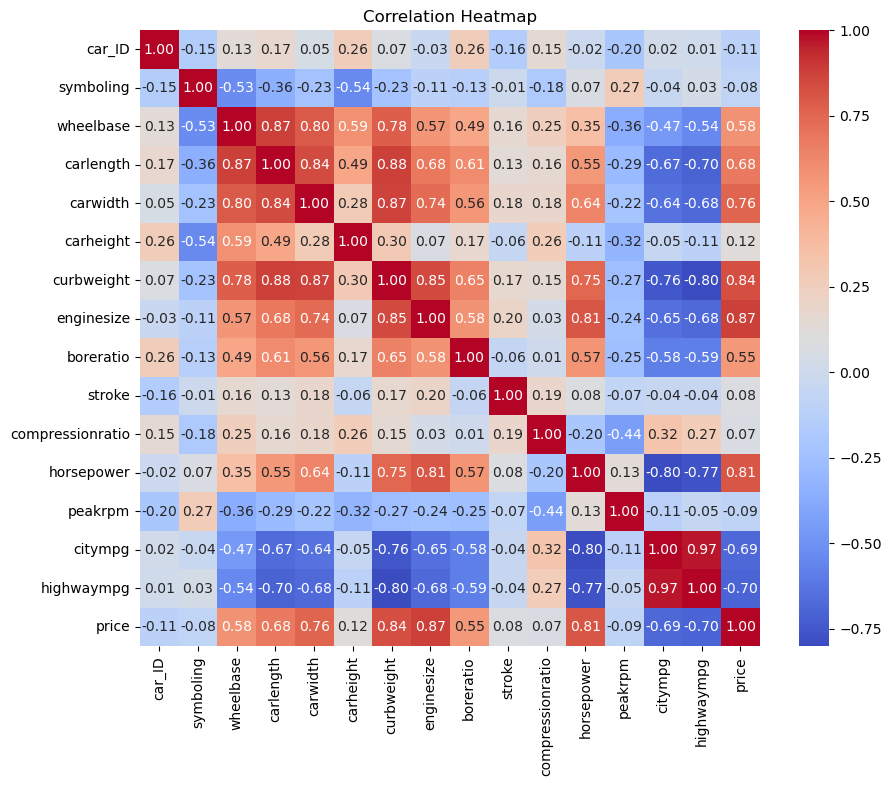

In [71]:
# heatmap of the data correlations
import seaborn as sns
new_data=data.select_dtypes(include=[np.number])  
corr = new_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### HeatMap insights

car_ID -> weak Negative

symboling -> weak Negative

wheelbase -> moderate positive

carlength -> moderate positive

carwidth -> strong positive

carheight -> weak positive

curbweight -> strong positive

enginesize -> strong positive

boreratio -> moderate positive

stroke -> weak postive

compressionratio -> weak positive

horsepower -> strong poitive

peakrpm -> weak negative

citympg -> moderate negative

highwaympg -> high negative

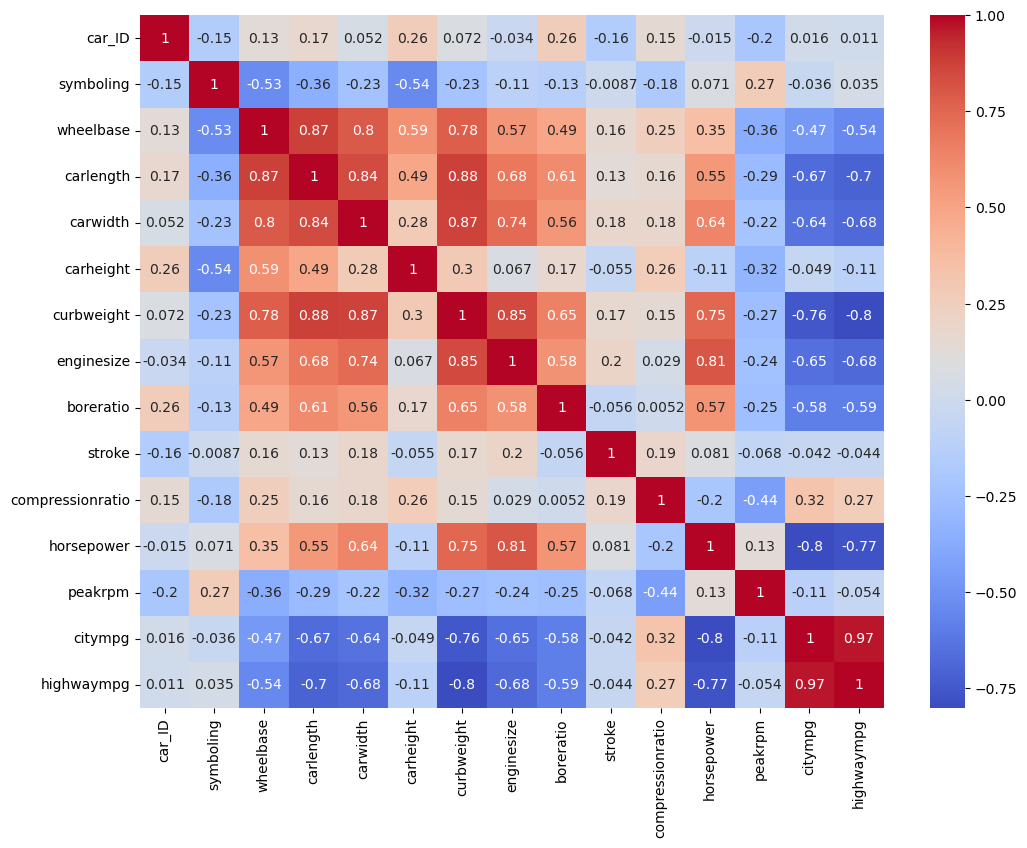

In [81]:
x=data.drop('price',axis=1)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

In [82]:
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)

corr_pairs = corr.where(mask)

strong_positive = corr_pairs[corr_pairs > 0.75].stack().reset_index()
strong_positive.columns = ['Feature 1', 'Feature 2', 'Correlation']

strong_negative = corr_pairs[corr_pairs < -0.75].stack().reset_index()
strong_negative.columns = ['Feature 1', 'Feature 2', 'Correlation']

print("Strong Positive Correlations (> 0.75):")
print(strong_positive)

print("\nStrong Negative Correlations (< -0.75):")
print(strong_negative)


Strong Positive Correlations (> 0.75):
     Feature 1   Feature 2  Correlation
0    wheelbase   carlength     0.874587
1    wheelbase    carwidth     0.795144
2    wheelbase  curbweight     0.776386
3    carlength    carwidth     0.841118
4    carlength  curbweight     0.877728
5     carwidth  curbweight     0.867032
6     carwidth       price     0.759325
7   curbweight  enginesize     0.850594
8   curbweight  horsepower     0.750739
9   curbweight       price     0.835305
10  enginesize  horsepower     0.809769
11  enginesize       price     0.874145
12  horsepower       price     0.808139
13     citympg  highwaympg     0.971337

Strong Negative Correlations (< -0.75):
    Feature 1   Feature 2  Correlation
0  curbweight     citympg    -0.757414
1  curbweight  highwaympg    -0.797465
2  horsepower     citympg    -0.801456
3  horsepower  highwaympg    -0.770544


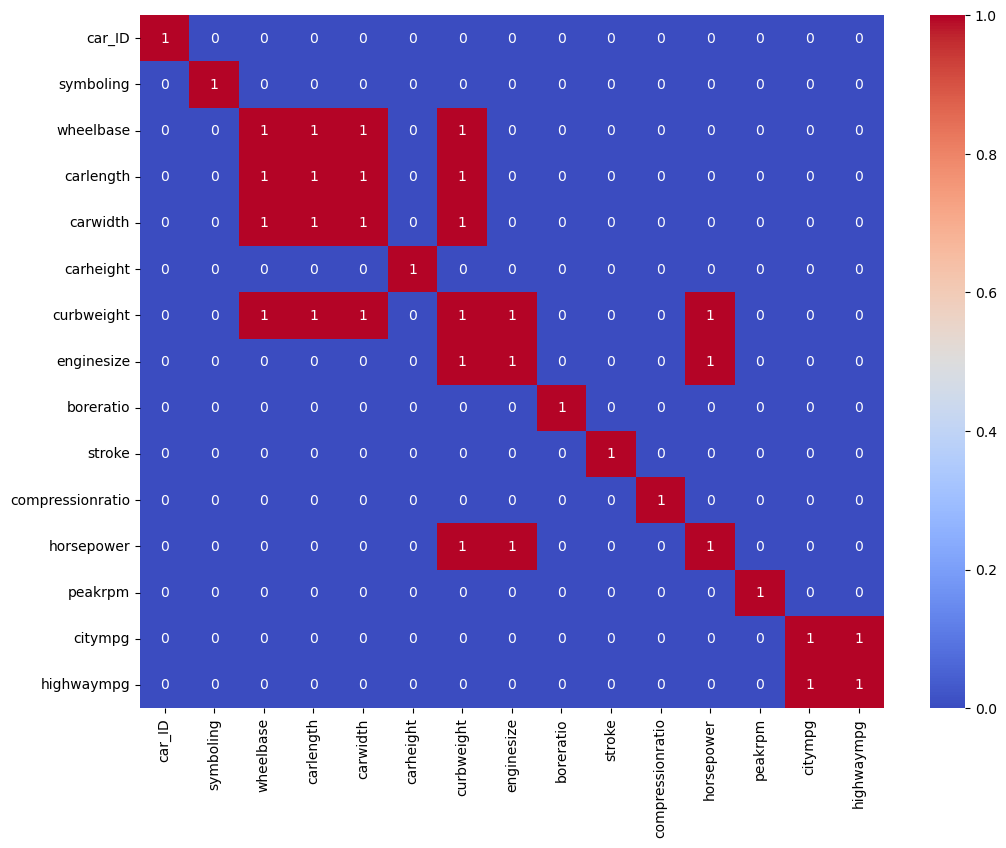

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

In [84]:
# Remove highly correlated features
to_remove = set()
for i in range(len(strong_positive)):
    if(strong_positive.iloc[i]['Feature 2'] == 'price'):
        continue
    to_remove.add(strong_positive.iloc[i]['Feature 2'])
x_reduced = x.drop(columns=list(to_remove))
print("Reduced feature set shape:", x_reduced.shape)


Reduced feature set shape: (205, 19)


In [88]:
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)

corr_pairs = corr.where(mask)

weak_positive = corr_pairs[corr_pairs > -0.10].stack().reset_index()
weak_positive.columns = ['Feature 1', 'Feature 2', 'Correlation']

weak_negative = corr_pairs[corr_pairs < 0.10].stack().reset_index()
weak_negative.columns = ['Feature 1', 'Feature 2', 'Correlation']

print("weak Negative Correlations (> -0.10):")
print(weak_negative)

print("\Weak Positive Correlations (< 0.10):")
print(weak_positive)


weak Negative Correlations (> -0.10):
     Feature 1   Feature 2  Correlation
0       car_ID   symboling    -0.151621
1       car_ID    carwidth     0.052387
2       car_ID  curbweight     0.071962
3       car_ID  enginesize    -0.033930
4       car_ID      stroke    -0.160824
..         ...         ...          ...
60     peakrpm     citympg    -0.113544
61     peakrpm  highwaympg    -0.054275
62     peakrpm       price    -0.085267
63     citympg       price    -0.685751
64  highwaympg       price    -0.697599

[65 rows x 3 columns]
\Weak Positive Correlations (< 0.10):
     Feature 1   Feature 2  Correlation
0       car_ID   wheelbase     0.129729
1       car_ID   carlength     0.170636
2       car_ID    carwidth     0.052387
3       car_ID   carheight     0.255960
4       car_ID  curbweight     0.071962
..         ...         ...          ...
75  horsepower     peakrpm     0.131073
76  horsepower       price     0.808139
77     peakrpm  highwaympg    -0.054275
78     peakrpm       

In [2]:
X=data['enginesize'].values.reshape(-1,1)
y=data['price'].values

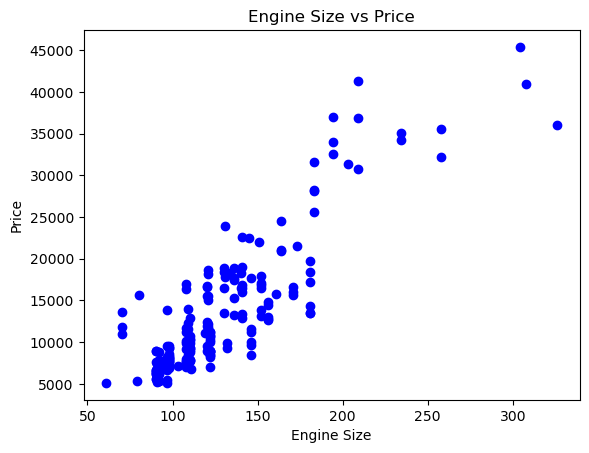

In [3]:
# visualize the relationship between engine size and price

plt.scatter(X, y, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs Price')
plt.show()

In [29]:
# Build a predictive model to estimate car prices based on engine size
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)


In [30]:
# Predict the price for a car with an engine size of 200
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_poly, y_train)
predicted_price = model.predict(poly_features.transform([[200]]))
print(f'The predicted price for a car with an engine size of 200 is: ${predicted_price[0]:.2f}')


The predicted price for a car with an engine size of 200 is: $27760.61


In [40]:
# mean squared error
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse:.2f}')

Mean Squared Error on test set: 11621389.46


In [9]:
# predict the price using linear regression

linear_model = LinearRegression()
linear_model.fit(X, y)
linear_predicted_price = linear_model.predict([[200]])
print(f'The predicted price using linear regression for a car with an engine size of 200 is: ${linear_predicted_price[0]:.2f}')

# mean squared error for linear regression
y_linear_pred = linear_model.predict(x_test)
linear_mse = mean_squared_error(y_test, y_linear_pred)
print(f'Mean Squared Error on test set using linear regression: {linear_mse:.2f}')


The predicted price using linear regression for a car with an engine size of 200 is: $25534.24
Mean Squared Error on test set using linear regression: 15405952.08


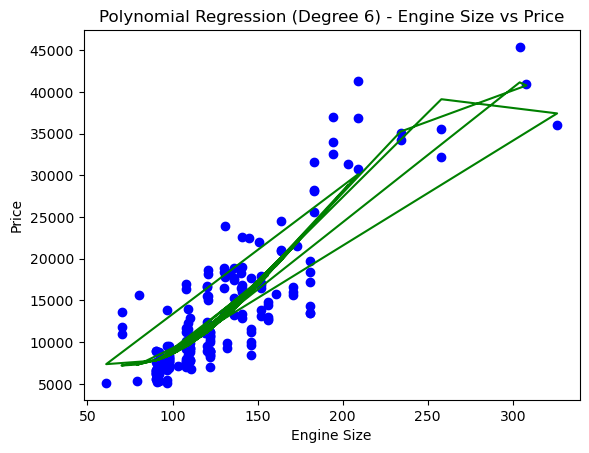

In [32]:
# Increase the flexibility of your model and observe how the curve changes.

poly_features_flex = PolynomialFeatures(degree=6)
X_poly_flex = poly_features_flex.fit_transform(X)
poly_model_flex = LinearRegression()
poly_model_flex.fit(X_poly_flex, y)
y_flex_pred = poly_model_flex.predict(X_poly_flex)

# Visualize the flexible polynomial regression model
plt.scatter(X, y, color='blue')
plt.plot(X, y_flex_pred, color='green')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Polynomial Regression (Degree 6) - Engine Size vs Price')
plt.show()


In [33]:
# evalute prediction errors

from sklearn.metrics import mean_squared_error

linear_error = mean_squared_error(y, linear_model.predict(X))
poly_error = mean_squared_error(y, poly_model_flex.predict(X_poly_flex))

print(f'Linear Regression Mean Squared Error: {linear_error:.2f}')
print(f'Polynomial Regression (Degree 6) Mean Squared Error: {poly_error:.2f}')


Linear Regression Mean Squared Error: 14980261.41
Polynomial Regression (Degree 6) Mean Squared Error: 13111144.09


In [58]:
from sklearn.metrics import r2_score

y_pred_train = model.predict(x_train_poly)
r2_train = r2_score(y_train, y_pred_train)
print(f'R-squared on training set: {r2_train:.2f}')

R-squared on training set: 0.77


In [90]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

lasso_pred = lasso_model.predict(x_test)
ridge_pred = ridge_model.predict(x_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f'Lasso Regression Mean Squared Error: {lasso_mse:.2f}')
print(f'Ridge Regression Mean Squared Error: {ridge_mse:.2f}')


Lasso Regression Mean Squared Error: 15465460.92
Ridge Regression Mean Squared Error: 15465460.94


In [97]:
from sklearn.linear_model import RidgeCV
import numpy as np

model = RidgeCV(alphas=np.arange(0.1,10,0.05))
model.fit(x_train, y_train)

print("Best alpha selected:", model.alpha_)
print("Best score : ", model.score(x_test, y_test))

Best alpha selected: 9.950000000000003
Best score :  0.8040933847321539


In [102]:
from sklearn.linear_model import LassoCV
import numpy as np

model = LassoCV(alphas=np.arange(0.1,10,0.05))
model.fit(x_train, y_train)
print("Best alpha selected:", model.alpha_)
print("Best score : ", model.score(x_test, y_test))

Best alpha selected: 9.950000000000003
Best score :  0.8040934124003777
